<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_AnushikaRana/InfosysSpringboard_Agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:

# STEP 1: Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from category_encoders import LeaveOneOutEncoder

The error `ModuleNotFoundError: No module named 'category_encoders'` indicates that the necessary library for Leave-One-Out Encoding is not installed. We can install it using `pip`.

In [1]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.0 MB/s eta 0:00:00


In [126]:
#STEP 2: Load Dataset
# ============================================================
file_path = "/content/crop_yield_dataset.csv"
df = pd.read_csv(file_path)

In [131]:
(df['Crop_Yield'] == 0).sum()


np.int64(2362)

In [132]:
print(df.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [133]:
df = df[df['Crop_Yield'] != 0]


In [127]:
# STEP 3: First Look at Dataset
# ============================================================
print("✅ First 5 rows:")
print(df.head())

✅ First 5 rows:
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  


In [135]:
df = df.reset_index(drop=True)

# Check the number of remaining rows
print("✅ Zero-yield rows dropped successfully!")
print("Remaining rows:", len(df))

✅ Zero-yield rows dropped successfully!
Remaining rows: 5738


In [136]:
print("\n✅ Dataset Info:")
print(df.info())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738 entries, 0 to 5737
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5738 non-null   object 
 1   Crop_Type     5738 non-null   object 
 2   Soil_Type     5738 non-null   object 
 3   Soil_pH       5738 non-null   float64
 4   Temperature   5738 non-null   float64
 5   Humidity      5738 non-null   float64
 6   Wind_Speed    5738 non-null   float64
 7   N             5737 non-null   float64
 8   P             5737 non-null   float64
 9   K             5737 non-null   float64
 10  Crop_Yield    5737 non-null   float64
 11  Soil_Quality  5737 non-null   float64
dtypes: float64(9), object(3)
memory usage: 538.1+ KB
None


In [137]:
print("\n✅ Missing Values:")
print(df.isnull().sum())


✅ Missing Values:
Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               1
P               1
K               1
Crop_Yield      1
Soil_Quality    1
dtype: int64


In [138]:
print("\n✅ Basic Statistics:")
print(df.describe(include='all'))


✅ Basic Statistics:
              Date Crop_Type Soil_Type      Soil_pH  Temperature     Humidity  \
count         5738      5738      5738  5738.000000  5738.000000  5738.000000   
unique         801        10         5          NaN          NaN          NaN   
top     2015-01-01     Wheat    Saline          NaN          NaN          NaN   
freq            10       588      1177          NaN          NaN          NaN   
mean           NaN       NaN       NaN     6.609446    21.155204    77.103990   
std            NaN       NaN       NaN     0.821310     5.536550     3.700591   
min            NaN       NaN       NaN     5.500000    10.015146    65.026378   
25%            NaN       NaN       NaN     6.250000    16.936181    74.785849   
50%            NaN       NaN       NaN     6.500000    20.948169    79.051831   
75%            NaN       NaN       NaN     6.750000    25.214151    80.000000   
max            NaN       NaN       NaN     8.000000    34.973622    80.000000   

      

In [139]:
# STEP 4: Basic EDA (Exploratory Data Analysis)
# ============================================================
# 1. Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Date             object
Crop_Type        object
Soil_Type        object
Soil_pH         float64
Temperature     float64
Humidity        float64
Wind_Speed      float64
N               float64
P               float64
K               float64
Crop_Yield      float64
Soil_Quality    float64
dtype: object


In [140]:
# 2. Check unique values for categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Date: ['2014-01-01' '2014-01-02' '2014-01-03' '2014-01-04' '2014-01-05'
 '2014-01-06' '2014-01-07' '2014-01-08' '2014-01-09' '2014-01-10'
 '2014-01-11' '2014-01-12' '2014-01-13' '2014-01-14' '2014-01-15'
 '2014-01-16' '2014-01-17' '2014-01-18' '2014-01-19' '2014-01-20'
 '2014-01-21' '2014-01-22' '2014-01-23' '2014-01-24' '2014-01-25'
 '2014-01-26' '2014-01-27' '2014-01-28' '2014-01-29' '2014-01-30'
 '2014-01-31' '2014-02-01' '2014-02-02' '2014-02-03' '2014-02-04'
 '2014-02-05' '2014-02-06' '2014-02-07' '2014-02-08' '2014-02-09'
 '2014-02-10' '2014-02-11' '2014-02-12' '2014-02-13' '2014-02-14'
 '2014-02-15' '2014-02-16' '2014-02-17' '2014-02-18' '2014-02-19'
 '2014-02-20' '2014-02-21' '2014-02-22' '2014-02-23' '2014-02-24'
 '2014-02-25' '2014-02-26' '2014-02-27' '2014-02-28' '2014-03-01'
 '2014-03-02' '2014-03-03' '2014-03-04' '2014-03-05' '2014-03-06'
 '2014-03-07' '2014-03-08' '2014-03-09' '2014-03-10' '2014-03-11'
 '2014-03-12' '2014-03-13' '2014-03-14' '2014-03-15'

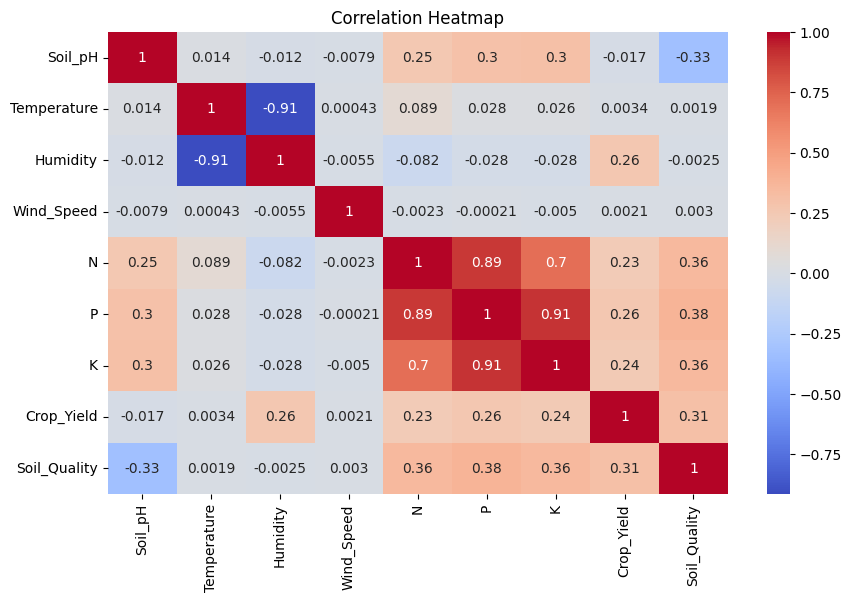

In [141]:
# 3. Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

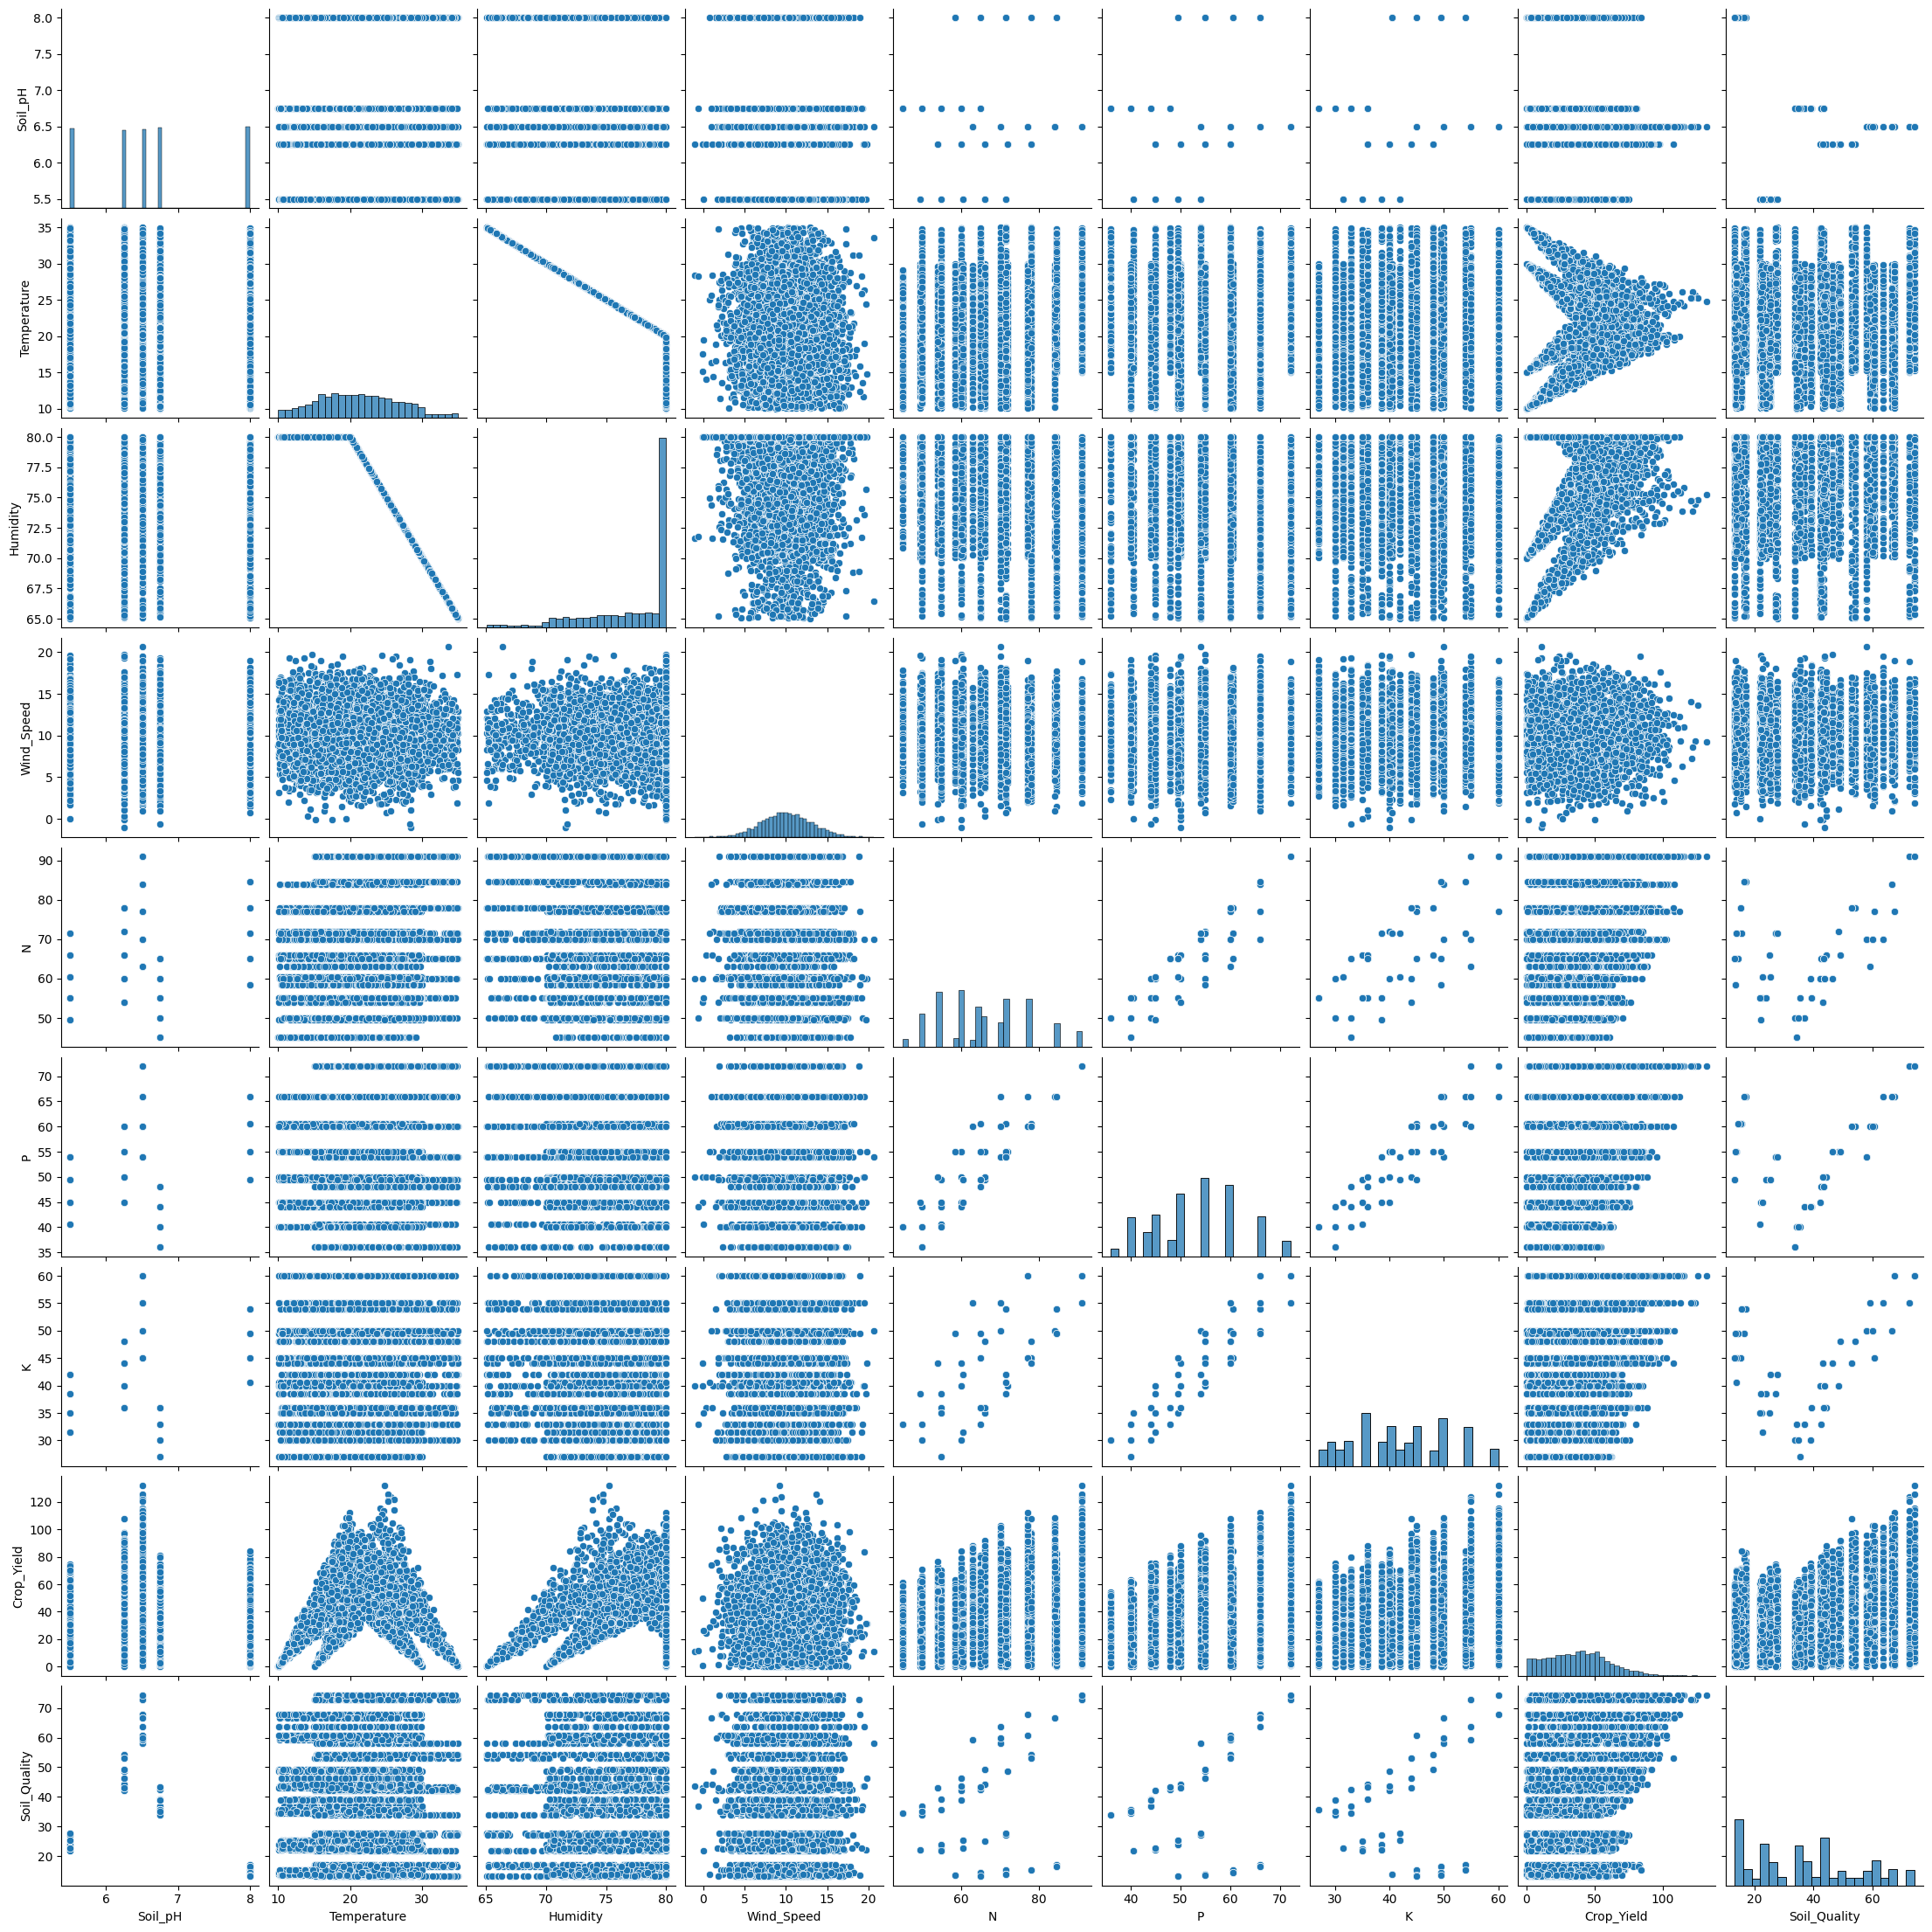

In [142]:
# 4. Pairplot for numeric relationships
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

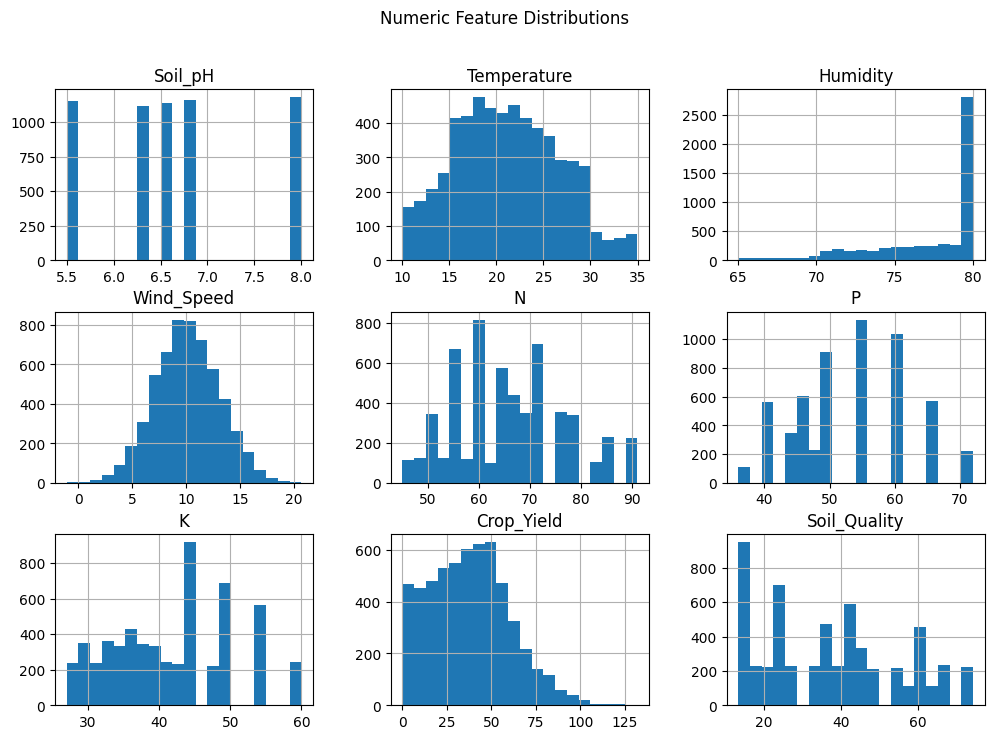

In [143]:
# 5. Distribution of numeric columns
df.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

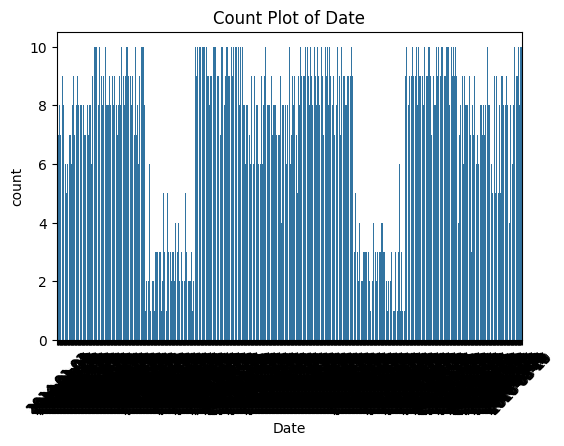

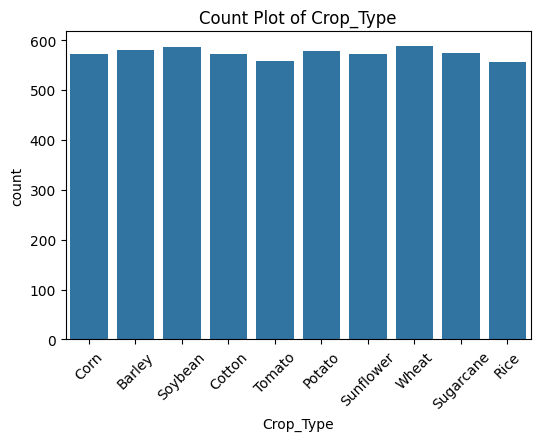

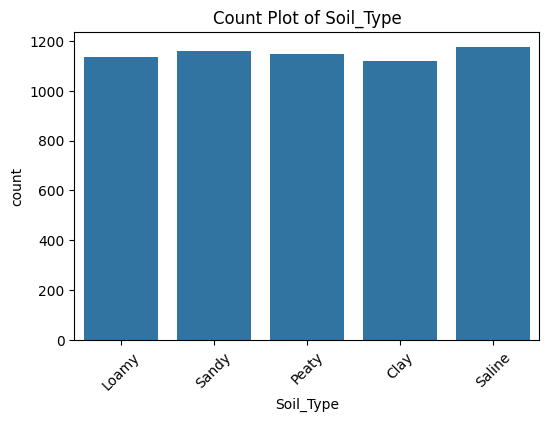

In [144]:
# 6. Countplot for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [145]:
#STEP 5: One Hot Encoding + Scaling (MinMax + Standard)
# ============================================================
df_onehot = df.copy()

# Apply One Hot Encoding
df_onehot = pd.get_dummies(df_onehot, drop_first=True)

In [146]:
df_onehot.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Date_2014-01-02,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,False,...,False,False,False,False,False,False,True,False,False,False
1,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,False,...,False,False,False,False,False,False,False,False,False,True
2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,False,...,False,True,False,False,False,False,False,True,False,False
3,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,False,...,False,False,False,False,False,False,False,False,False,True
4,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,False,...,False,False,False,False,True,False,False,False,False,False


In [147]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_onehot), columns=df_onehot.columns)

In [148]:
df_minmax.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Date_2014-01-02,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,0.4,0.402165,0.996489,0.444986,0.847826,0.833333,0.696970,0.794697,0.874403,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.390116,1.000000,0.173397,0.108696,0.111111,0.090909,0.446583,0.355631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.244216,1.000000,0.403826,0.097826,0.250000,0.348485,0.249762,0.145392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.192784,1.000000,0.526574,0.217391,0.222222,0.272727,0.222370,0.427304,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.3,0.332878,1.000000,0.426900,0.326087,0.250000,0.393939,0.168296,0.475085,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [149]:
# Apply StandardScaler
std_scaler = StandardScaler()
df_standard = pd.DataFrame(std_scaler.fit_transform(df_onehot), columns=df_onehot.columns)

In [150]:
df_standard.head()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Date_2014-01-02,...,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Sunflower,Crop_Type_Tomato,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Saline,Soil_Type_Sandy
0,-0.133269,-0.199172,0.768440,-0.496365,1.659296,1.483266,0.936859,3.003793,1.656508,-0.034949,...,-0.327558,-0.337257,-0.33372,-0.332752,-0.328210,-0.337898,2.013829,-0.500109,-0.507994,-0.503374
1,0.171149,-0.253493,0.782649,-2.468195,-1.463122,-1.474423,-1.397533,0.944353,-0.130845,-0.034949,...,-0.327558,-0.337257,-0.33372,-0.332752,-0.328210,-0.337898,-0.496567,-0.500109,-0.507994,1.986593
2,-1.350943,-0.911262,0.782649,-0.795201,-1.509040,-0.905636,-0.405416,-0.220041,-0.855193,-0.034949,...,-0.327558,2.965098,-0.33372,-0.332752,-0.328210,-0.337898,-0.496567,1.999564,-0.507994,-0.503374
3,0.171149,-1.143134,0.782649,0.095989,-1.003943,-1.019394,-0.697215,-0.382096,0.116092,-0.034949,...,-0.327558,-0.337257,-0.33372,-0.332752,-0.328210,-0.337898,-0.496567,-0.500109,-0.507994,1.986593
4,-0.437688,-0.511542,0.782649,-0.627676,-0.544764,-0.905636,-0.230337,-0.701998,0.280717,-0.034949,...,-0.327558,-0.337257,-0.33372,-0.332752,3.046827,-0.337898,-0.496567,-0.500109,-0.507994,-0.503374


In [151]:
# Save both as CSV
df_minmax.to_csv("/content/crop_yield_onehot_minmax.csv", index=False)
df_standard.to_csv("/content/crop_yield_onehot_standard.csv", index=False)
print("\n✅ Saved OneHot Encoded datasets with MinMax & Standard Scaling")


✅ Saved OneHot Encoded datasets with MinMax & Standard Scaling


In [152]:
# STEP 6: Leave One Out Encoding + Scaling
# ============================================================
df_loo = df.copy()

# Apply Leave-One-Out Encoding for categorical features
loo = LeaveOneOutEncoder(cols=cat_cols)
df_loo_encoded = loo.fit_transform(df_loo, df_loo.select_dtypes(include=np.number).iloc[:,0])  # using first numeric column as target proxy

In [153]:
# Apply minmax scaler
df_loo_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_loo_encoded), columns=df_loo_encoded.columns)

In [154]:
df_loo_minmax.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,0.283333,0.935162,0.4,0.4,0.402165,0.996489,0.444986,0.847826,0.833333,0.696970,0.794697,0.874403
1,0.266667,0.033600,0.5,0.5,0.390116,1.000000,0.173397,0.108696,0.111111,0.090909,0.446583,0.355631
2,0.350000,0.321388,0.0,0.0,0.244216,1.000000,0.403826,0.097826,0.250000,0.348485,0.249762,0.145392
3,0.266667,0.849997,0.5,0.5,0.192784,1.000000,0.526574,0.217391,0.222222,0.272727,0.222370,0.427304
4,0.300000,0.979044,0.3,0.3,0.332878,1.000000,0.426900,0.326087,0.250000,0.393939,0.168296,0.475085


In [155]:
#Apply standard scaler
df_loo_standard = pd.DataFrame(std_scaler.fit_transform(df_loo_encoded), columns=df_loo_encoded.columns)

In [156]:
df_loo_standard.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,-1.225901,1.079888,-0.133269,-0.133269,-0.199172,0.768440,-0.496365,1.659296,1.483266,0.936859,3.003793,1.656508
1,-1.353083,-1.958385,0.171149,0.171149,-0.253493,0.782649,-2.468195,-1.463122,-1.474423,-1.397533,0.944353,-0.130845
2,-0.717172,-0.988536,-1.350943,-1.350943,-0.911262,0.782649,-0.795201,-1.509040,-0.905636,-0.405416,-0.220041,-0.855193
3,-1.353083,0.792881,0.171149,0.171149,-1.143134,0.782649,0.095989,-1.003943,-1.019394,-0.697215,-0.382096,0.116092
4,-1.098719,1.227771,-0.437688,-0.437688,-0.511542,0.782649,-0.627676,-0.544764,-0.905636,-0.230337,-0.701998,0.280717


In [157]:
# Save
df_loo_minmax.to_csv("/content/crop_yield_loo_minmax.csv", index=False)
df_loo_standard.to_csv("/content/crop_yield_loo_standard.csv", index=False)
print("\n✅ Saved Leave-One-Out Encoded datasets with MinMax & Standard Scaling")


✅ Saved Leave-One-Out Encoded datasets with MinMax & Standard Scaling


In [158]:
# STEP 7: Label Encoding + Scaling
# ============================================================
df_label = df.copy()

# Apply Label Encoding for categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col])

In [159]:
#Apply minmax scaler
df_label_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_label), columns=df_label.columns)

In [160]:
df_label_minmax.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,0.0,0.111111,0.25,0.4,0.402165,0.996489,0.444986,0.847826,0.833333,0.696970,0.794697,0.874403
1,0.0,0.000000,1.00,0.5,0.390116,1.000000,0.173397,0.108696,0.111111,0.090909,0.446583,0.355631
2,0.0,0.555556,0.50,0.0,0.244216,1.000000,0.403826,0.097826,0.250000,0.348485,0.249762,0.145392
3,0.0,0.222222,1.00,0.5,0.192784,1.000000,0.526574,0.217391,0.222222,0.272727,0.222370,0.427304
4,0.0,0.888889,0.00,0.3,0.332878,1.000000,0.426900,0.326087,0.250000,0.393939,0.168296,0.475085


In [161]:
#Apply Standard Scaler
df_label_standard = pd.DataFrame(std_scaler.fit_transform(df_label), columns=df_label.columns)

In [162]:
df_label_standard.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,-1.716037,-1.215777,-0.724365,-0.133269,-0.199172,0.768440,-0.496365,1.659296,1.483266,0.936859,3.003793,1.656508
1,-1.716037,-1.563229,1.402036,0.171149,-0.253493,0.782649,-2.468195,-1.463122,-1.474423,-1.397533,0.944353,-0.130845
2,-1.716037,0.174028,-0.015564,-1.350943,-0.911262,0.782649,-0.795201,-1.509040,-0.905636,-0.405416,-0.220041,-0.855193
3,-1.716037,-0.868326,1.402036,0.171149,-1.143134,0.782649,0.095989,-1.003943,-1.019394,-0.697215,-0.382096,0.116092
4,-1.716037,1.216383,-1.433165,-0.437688,-0.511542,0.782649,-0.627676,-0.544764,-0.905636,-0.230337,-0.701998,0.280717


In [163]:
# Save
df_label_minmax.to_csv("/content/crop_yield_label_minmax.csv", index=False)
df_label_standard.to_csv("/content/crop_yield_label_standard.csv", index=False)
print("\n✅ Saved Label Encoded datasets with MinMax & Standard Scaling")

print("\n🎯 All files saved successfully")


✅ Saved Label Encoded datasets with MinMax & Standard Scaling

🎯 All files saved successfully


In [164]:
df.sample(5)

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
1821,2014-10-08,Potato,Sandy,6.75,22.633011,77.366989,12.662505,55.0,40.0,27.0,37.140483,35.583333
937,2014-04-27,Cotton,Peaty,5.50,28.109729,71.890271,9.724882,60.5,49.5,42.0,10.038324,25.333333
197,2014-01-28,Corn,Saline,8.00,11.594742,80.000000,5.639721,78.0,60.5,45.0,12.255162,15.291667
2638,2015-01-12,Sunflower,Peaty,5.50,10.044029,80.000000,3.107360,55.0,49.5,38.5,0.265334,23.833333
2061,2014-11-04,Rice,Peaty,5.50,23.914034,76.085966,12.772033,71.5,54.0,38.5,51.337026,27.333333


In [165]:
df.isnull().sum()

,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,1
P,1
K,1


In [166]:
df.isnull().values.any()

np.True_

In [167]:
df.isnull().sum().sum()

np.int64(5)

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [171]:
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

✅ Dataset loaded successfully!
Shape: (5738, 12)
Columns: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


In [174]:
#2️ Define Features (X) and Target (y)
# ------------------------------
target_col = 'Crop_Yield'
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])


Target column: Crop_Yield
Feature count: 11


In [175]:
#Split the dataset
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (4590, 11), Test shape: (1148, 11)


In [176]:
#Define a helper to evaluate models
# ------------------------------
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    df_metrics = pd.DataFrame({
        "Metric": ["MSE", "MAE", "RMSE", "R² Score"],
        "Value": [mse, mae, rmse, r2]
    })
    print(f"\n📊 Evaluation Metrics for {model_name}:")
    display(df_metrics)
    return df_metrics

In [178]:
# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

✅ Rows with missing target values removed.
Remaining rows: 5737


In [191]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_label_minmax.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 12)

Target column: Crop_Yield
Feature count: 11
Train shape: (4589, 11), Test shape: (1148, 11)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.001365,0.026155,0.036943,0.952046
1,LSTM,0.001525,0.028532,0.039050,0.946420
2,XGBoost,0.001587,0.028609,0.039842,0.944222
3,SVR,0.003211,0.045704,0.056663,0.887185



💾 Results saved as 'regression_models_summary.csv'


In [182]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_label_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 12)

Target column: Crop_Yield
Feature count: 11
✅ Rows with missing target values removed.
Remaining rows: 5737
Train shape: (4589, 11), Test shape: (1148, 11)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.047863,0.154715,0.218776,0.951948
1,XGBoost,0.057699,0.172392,0.240207,0.942073
2,LSTM,0.058873,0.179841,0.242638,0.940894
3,SVR,0.060207,0.173565,0.245372,0.939555



💾 Results saved as 'regression_models_summary.csv'


In [184]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_loo_minmax.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 12)

Target column: Crop_Yield
Feature count: 11
✅ Rows with missing target values removed.
Remaining rows: 5737
Train shape: (4589, 11), Test shape: (1148, 11)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.001286,0.025561,0.035866,0.954800
1,XGBoost,0.001455,0.027505,0.038148,0.948866
2,LSTM,0.001876,0.032557,0.043312,0.934084
3,SVR,0.003219,0.046137,0.056734,0.886901



💾 Results saved as 'regression_models_summary.csv'


In [186]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_loo_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Rows with missing target values removed.")
print("Remaining rows:", len(df))

# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 12)

Target column: Crop_Yield
Feature count: 11
✅ Rows with missing target values removed.
Remaining rows: 5737
Train shape: (4589, 11), Test shape: (1148, 11)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.045170,0.151585,0.212533,0.954651
1,XGBoost,0.051808,0.163852,0.227613,0.947988
2,SVR,0.071624,0.190016,0.267627,0.928093
3,LSTM,0.089268,0.232689,0.298778,0.910379



💾 Results saved as 'regression_models_summary.csv'


In [188]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_onehot_minmax.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 822)

Target column: Crop_Yield
Feature count: 821
Train shape: (4589, 821), Test shape: (1148, 821)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.001270,0.025350,0.035636,0.955377
1,XGBoost,0.001781,0.029605,0.042204,0.937415
2,LSTM,0.002456,0.035934,0.049563,0.913687
3,SVR,0.007289,0.069394,0.085375,0.743889



💾 Results saved as 'regression_models_summary.csv'


In [190]:
# 1️⃣ Load dataset
# -------------------------------------------------------
file_path = "/content/crop_yield_onehot_standard.csv"  # dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

# -------------------------------------------------------
# 2️⃣ Select features (X) and target (y)
# -------------------------------------------------------
target_col = [col for col in df.columns if 'yield' in col.lower()][0]
X = df.drop(columns=[target_col])
y = df[target_col]
print(f"\nTarget column: {target_col}")
print("Feature count:", X.shape[1])

# Remove rows with missing values in the target variable
df = df.dropna(subset=[target_col])
X = df.drop(columns=[target_col])
y = df[target_col]


# -------------------------------------------------------
# 3️⃣ Train-test split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------------------------------
# 4️⃣ Function to evaluate models
# -------------------------------------------------------
def evaluate(model_name, y_true, y_pred, results_list):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results_list.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"{model_name} ✅ completed.")
    return results_list

# -------------------------------------------------------
# 5️⃣ Train models and evaluate
# -------------------------------------------------------
results = []

## 🌳 Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate("Random Forest", y_test, y_pred_rf, results)

## ⚡ XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate("XGBoost", y_test, y_pred_xgb, results)

## 💫 Support Vector Regressor (SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
evaluate("SVR", y_test, y_pred_svr, results)

## 🧠 LSTM (Deep Learning)
# Reshape for LSTM (samples, timesteps, features)
timesteps = 1
n_features = X_train.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

tf.random.set_seed(42)
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_lstm = lstm_model.predict(X_test_lstm).ravel()
evaluate("LSTM", y_test, y_pred_lstm, results)

# -------------------------------------------------------
# 6️⃣ Summary table for all models
# -------------------------------------------------------
summary_df = pd.DataFrame(results)
summary_df[["MSE", "MAE", "RMSE", "R² Score"]] = summary_df[["MSE", "MAE", "RMSE", "R² Score"]].round(6)
summary_df = summary_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 Final Summary Table (All Regression Models):")
display(summary_df)

# Save results
summary_df.to_csv("regression_models_summary.csv", index=False)
print("\n💾 Results saved as 'regression_models_summary.csv'")

✅ Dataset loaded successfully!
Shape: (5738, 822)

Target column: Crop_Yield
Feature count: 821
Train shape: (4589, 821), Test shape: (1148, 821)
Random Forest ✅ completed.
XGBoost ✅ completed.
SVR ✅ completed.
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM ✅ completed.

📊 Final Summary Table (All Regression Models):


,Model,MSE,MAE,RMSE,R² Score
0,Random Forest,0.044599,0.150319,0.211185,0.955225
1,XGBoost,0.060904,0.172940,0.246788,0.938855
2,LSTM,0.087507,0.208747,0.295816,0.912147
3,SVR,0.143743,0.269928,0.379135,0.855689



💾 Results saved as 'regression_models_summary.csv'
